In [1]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data=pd.read_csv("airlines.csv")

In [3]:
data.shape

(3999, 11)

In [4]:
data.shape

(3999, 11)

In [5]:
data.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [7]:
data.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


In [8]:
def norm_fun(i):
    x=((i-i.min())/(i.max()-i.min()))
    return(x)

In [9]:
df_norm=norm_fun(data.iloc[:,1:])
df_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


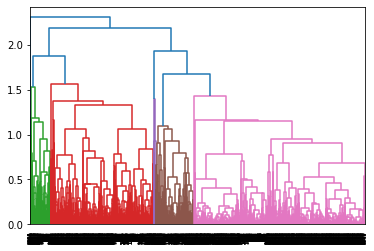

In [10]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [11]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [12]:
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [13]:
y_hc=hc.fit_predict(df_norm)

In [14]:
cluster=pd.DataFrame(y_hc,columns=['clusters'])
cluster.value_counts()

clusters
2           2493
0           1471
1             31
3              4
dtype: int64

In [15]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [16]:
df_norm.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [17]:
model=KMeans()
model.fit(df_norm)
model.labels_

array([0, 0, 0, ..., 1, 3, 3])

In [18]:
md=pd.Series(model.labels_)
data['clust']=md
df_norm.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [19]:
data.groupby(data.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,49947.915802,90.006920,1.122261,1.019608,1.001153,3465.412918,6.908881,244.115340,0.728950,5569.983852,0.0
1,71825.907859,169.991870,3.560976,1.000000,1.013550,33699.663957,18.929539,573.024390,1.739837,3230.737127,1.0
2,105259.898462,362.046154,1.156923,1.030769,1.018462,9042.529231,10.843077,1027.726154,3.280000,6066.513846,1.0
3,33091.529526,94.040658,1.070668,1.016457,1.006776,3246.130687,6.178122,212.644724,0.603098,1994.135528,0.0
4,137573.542763,54.723684,3.703947,1.000000,1.026316,33994.559211,17.174342,219.851974,0.684211,6080.861842,0.0
5,63234.635057,223.591954,1.155172,1.034483,1.000000,8670.959770,10.135057,1032.341954,3.025862,2725.405172,1.0
6,138990.179954,222.161731,4.214123,1.002278,1.036446,55620.562642,21.271071,831.997722,2.480638,6235.801822,1.0
7,99635.000000,91.614650,3.468153,1.003185,1.019108,28857.353503,17.289809,228.213376,0.573248,2811.152866,0.0


In [20]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,6


In [21]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [22]:
array=data.values
array

array([[28143,     0,     1, ...,  7000,     0,     0],
       [19244,     0,     1, ...,  6968,     0,     0],
       [41354,     0,     1, ...,  7034,     0,     0],
       ...,
       [73597,     0,     3, ...,  1402,     1,     1],
       [54899,     0,     1, ...,  1401,     0,     3],
       [ 3016,     0,     1, ...,  1398,     0,     3]], dtype=int64)

In [23]:
stscaler=StandardScaler().fit(array)
x=stscaler.transform(array)

In [24]:
dbscan=DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(x)
dbscan.labels_

array([0, 0, 0, ..., 4, 5, 5], dtype=int64)

In [25]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])
cl

,Cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,7
3995,7
3996,4
3997,5
